<a href="https://colab.research.google.com/github/FahimShahriarAnik/Data-Mining-EDA-on-Banking-Dataset/blob/main/ML_DM_banking_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Title of the dataset


# **Bank Marketing**

Brief explanation of the **dataset**

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the
product (bank term deposit) would be ('yes') or not ('no') subscribed.

Import Dataset and libraries

In [ ]:
import pandas as pd
%pip install ucimlrepo
# Load the dataset
from ucimlrepo import fetch_ucirepo
bank_marketing = fetch_ucirepo(id=222)

df = bank_marketing.data.features
y = bank_marketing.data.targets

2. Import and Inspect the Data

In [ ]:
# Basic inspection
print(f"Shape of the dataset: {df.shape}\n")  # Shape of the dataset
print(f"-------------------------------------Column names: {df.columns}\n")  # Column names
print(f"-------------------------------------Data types and null values: {df.info()}\n") # Data types and null values
print(f"-------------------------------------First 5 rows: {df.head()}\n")  # First 5 rows

Shape of the dataset: (45211, 16)

-------------------------------------Column names: Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day_of_week', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign  

3. Handle Missing Data


In [ ]:
# Checking for missing values and dropping poutcome column because we won't do prediction. It has 36959 null values
df.drop(columns=['poutcome'], inplace = True)
print(df.isnull().sum())

# Dropping rows with missing values
df_cleaned = df.replace('unknown', pd.NA).dropna()

<ipython-input-3-404de7e39a65>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['poutcome'], inplace = True)


age                0
job              288
marital            0
education       1857
default            0
balance            0
housing            0
loan               0
contact        13020
day_of_week        0
month              0
duration           0
campaign           0
pdays              0
previous           0
dtype: int64


4. Explore Data Characteristics


In [ ]:
# Summary statistics for numerical data
numerical_columns = ['age','balance']
print(df[numerical_columns].describe())
print('\n----------------------------------------------------\n')
# Summary statistics for categorical data
categorical_columns = ['job','marital','education']
for column in categorical_columns:
  print(df[column].value_counts())
  print('\n')

                age        balance
count  45211.000000   45211.000000
mean      40.936210    1362.272058
std       10.618762    3044.765829
min       18.000000   -8019.000000
25%       33.000000      72.000000
50%       39.000000     448.000000
75%       48.000000    1428.000000
max       95.000000  102127.000000

----------------------------------------------------

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
Name: count, dtype: int64


marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64


education
secondary    23202
tertiary     13301
primary       6851
Name: count, dtype: int64




5. Perform Data Transformation


In [ ]:
# Encoding categorical variables using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['marital', 'education',])
print(df_encoded.head())
# Label Encoding for binary categorical columns
df['default'] = df['default'].map({'yes': 1, 'no': 0})
df['housing'] = df['housing'].map({'yes': 1, 'no': 0})
df['loan'] = df['loan'].map({'yes': 1, 'no': 0})

   age           job default  balance housing loan contact  day_of_week month  \
0   58    management      no     2143     yes   no     NaN            5   may   
1   44    technician      no       29     yes   no     NaN            5   may   
2   33  entrepreneur      no        2     yes  yes     NaN            5   may   
3   47   blue-collar      no     1506     yes   no     NaN            5   may   
4   33           NaN      no        1      no   no     NaN            5   may   

   duration  campaign  pdays  previous  marital_divorced  marital_married  \
0       261         1     -1         0             False             True   
1       151         1     -1         0             False            False   
2        76         1     -1         0             False             True   
3        92         1     -1         0             False             True   
4       198         1     -1         0             False            False   

   marital_single  education_primary  education_se

<ipython-input-5-9f34ab56d06f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['default'] = df['default'].map({'yes': 1, 'no': 0})
<ipython-input-5-9f34ab56d06f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['housing'] = df['housing'].map({'yes': 1, 'no': 0})
<ipython-input-5-9f34ab56d06f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

6. Visualize Data Relationships


<ipython-input-6-733aded23b24>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y']=y


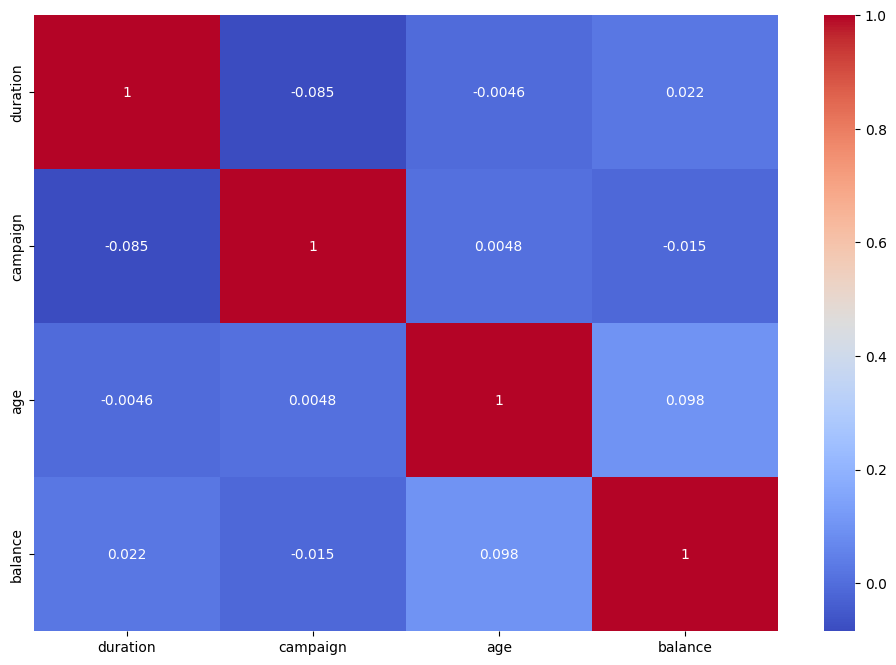

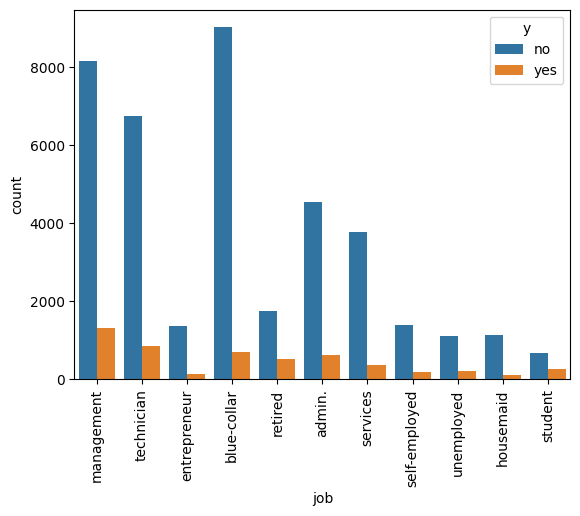

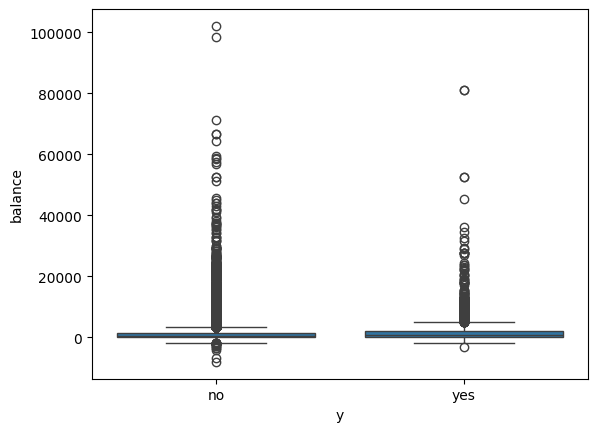

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
df['y']=y
# Correlation matrix for numerical variables
plt.figure(figsize=(12,8))
numerical_columns=['duration','campaign','age','balance']
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='coolwarm')
plt.show()
print('\n')
# Bar plot to see the distribution of job types against the target
sns.countplot(x='job', hue='y', data=df)
plt.xticks(rotation=90)
plt.show()
print('\n')
# Box plot to visualize balance distribution by the target
sns.boxplot(x='y', y='balance', data=df)
plt.show()
print('\n\n\n')

7. Handling Outliers


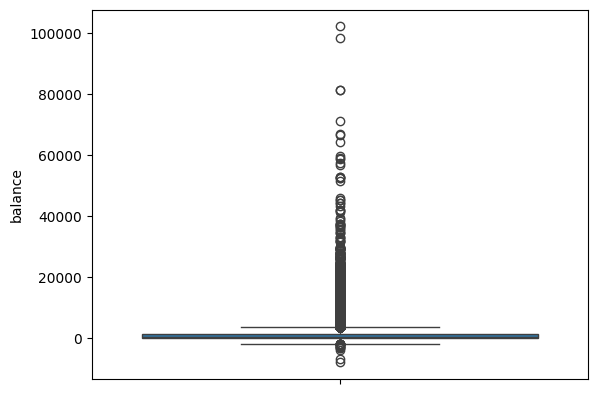

In [ ]:
# Boxplot for detecting outliers in balance
sns.boxplot(df['balance'])
plt.show()

# Removing outliers based on IQR for 'balance'
Q1 = df['balance'].quantile(0.25)
Q3 = df['balance'].quantile(0.75)
IQR = Q3 - Q1
df_no_outliers = df[~((df['balance'] < (Q1 - 1.5 * IQR)) | (df['balance'] > (Q3 + 1.5 * IQR)))]